In [27]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
path = "..\Data\Data_ECB.csv"

df = pd.read_csv(path)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [13]:
%%bash
python -V

Python 3.8.10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


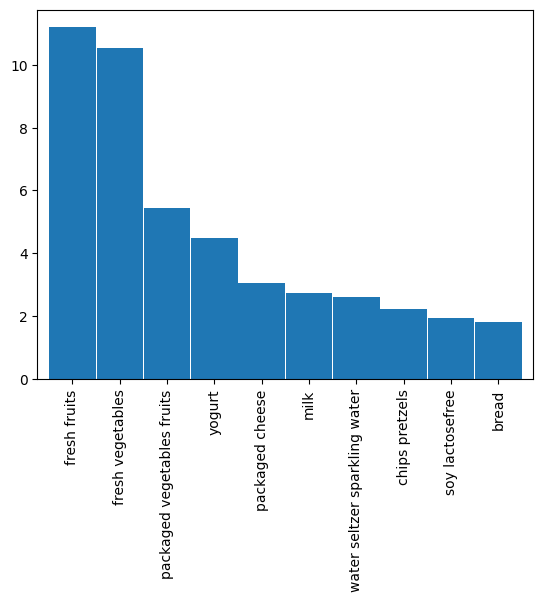

In [10]:
(df["product_name"].value_counts(normalize=True)*100)[:10].plot(kind="bar", width=0.98);

In [5]:
list_products = [element for innerlist in df["product_name"].str.split(" ").to_list() for element in innerlist]

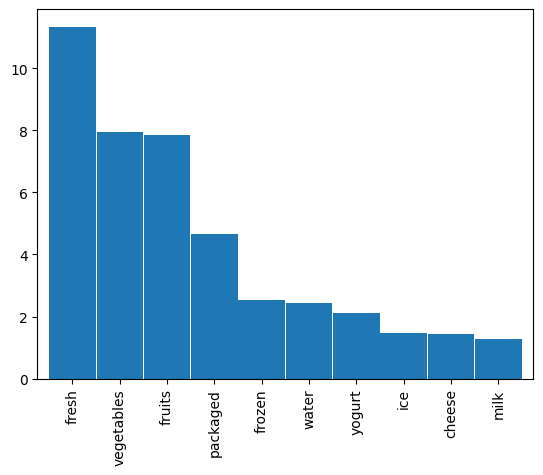

In [6]:
(pd.Series(list_products).value_counts(normalize=True)*100)[:10].plot(kind="bar", width=0.98);

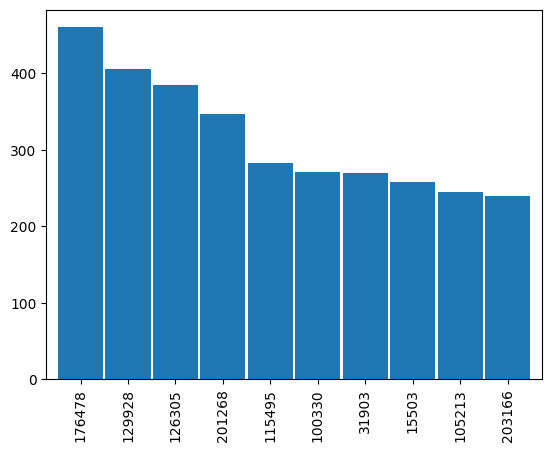

In [7]:
df["user_id"].value_counts()[:10].plot(kind="bar", width=0.95);

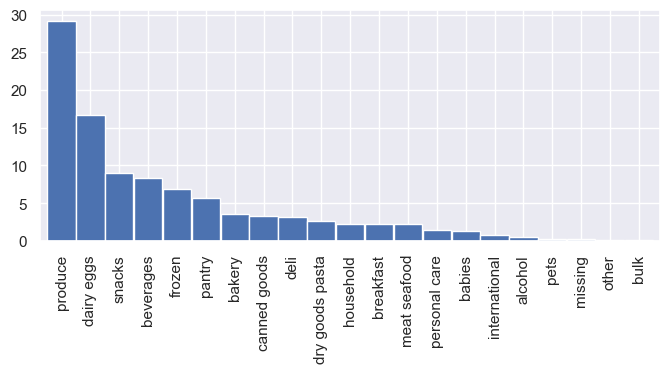

In [30]:
(100*df["department"].value_counts(normalize=True))\
    .plot(kind="bar", width=0.98, figsize=(8,3)
         );

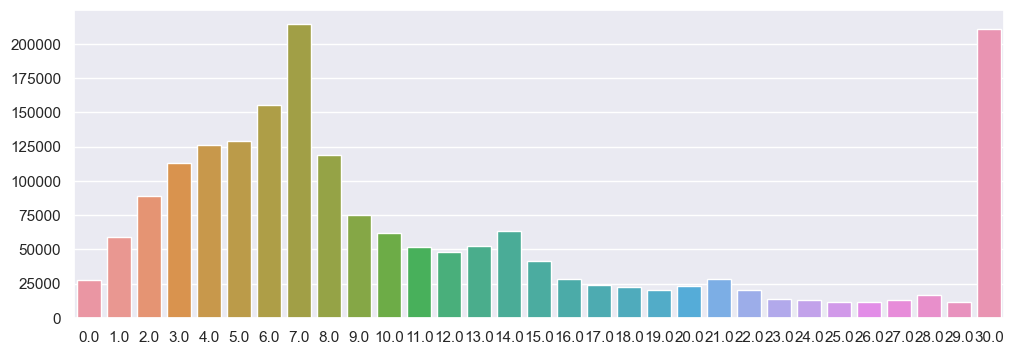

In [50]:
_, ax = plt.subplots(figsize=(12,4))
sns.barplot(x=df["days_since_prior_order"].value_counts().sort_index().index,
           y=df["days_since_prior_order"].value_counts().sort_index().values);

In [89]:
df["active_days"]= (df["days_since_prior_order"] == 7) | (df["days_since_prior_order"] == 30)

In [167]:
grouped = (df.groupby(["active_days","department"])["department"].count()/\
df.groupby(["active_days","department"])["department"].count().unstack().sum(axis=1)).sort_values(ascending=False).unstack(0)*100

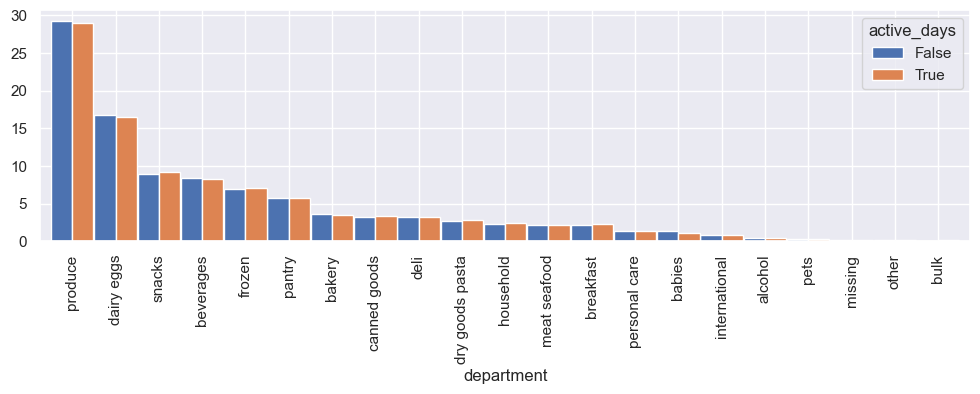

In [178]:
_, ax = plt.subplots(figsize=(12,3))
grouped.sort_values(by=False, ascending=False).plot(kind="bar", width=0.98, ax=ax);

In [ ]:
sns.barplot()